In [46]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, make_scorer, precision_score
from sklearn import metrics
import os
import json
from werkzeug.utils import secure_filename
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from app import calcular_caract, file_to_binary, leer_img

### 1. Definir función de características:

In [ ]:
# AÑADIR FUNCIÓN:
def caract(filename) -> np.array:
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    pass

In [3]:
def histograma_lab(filename, bins, mask=None):
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # Convierte la imagen a espacio L*a*b*.
    histogram = cv2.calcHist([img], [0, 1, 2], mask, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    histogram = cv2.normalize(histogram, histogram).flatten()
    return histogram

In [4]:
def histograma_rgb(filename, bins, mask=None):
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convierte la imagen a espacio L*a*b*.
    histogram = cv2.calcHist([img], [0, 1, 2], mask, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    histogram = cv2.normalize(histogram, histogram).flatten()
    return histogram

### 2. Calcular característica para todo dataset:

In [20]:
d = []

for i in range(0, 1000):
    if os.path.isfile(os.path.join('static', str(i) + '.jpg')):
        path = os.path.join('static', str(i) + '.jpg')
        hist = histograma_lab(path, 8) ## CAMBIAR FUNCIÓN CARACTERÍSTICAS
        d.append(hist)

In [48]:
# comprobar que sale 1000

len(d)

1000

### 3. Generar df: 

INFO: hay 10 clases (las del vector 'clases'). las 100 primeras imags (0.jpg - 99.jpg) corresponden a la clase 'indigena', las 100 siguientes (100.jpg - 199.jpg) a la clase playa, ... y así.

In [15]:
df = pd.DataFrame(d)

clases = ['indigena', 'playa', 'monumento', 'autobus', 'dinosaurio', 'elefante', 'rosa', 'caballo', 'montaña', 'comida']
labels = []

for c in clases: 
    labels += [c]*100

df['class'] = labels

In [26]:
# comprobar que se ha añadido columna class:

df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,indigena
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,indigena
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,indigena
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,indigena
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,indigena


### 4. Entrenar y evaluar modelo KNN:

In [55]:
X_train = df.iloc[:,0:512]
y_train = df['class']

knn = neighbors.KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [52]:
param_grid = {'n_neighbors': [2], 'metric': ['euclidean']}  
custom_scorer = make_scorer(precision_score, greater_is_better=True, average='macro')
grid_search = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=10, scoring=custom_scorer)
grid_search.fit(X_train,y_train)
grid_search.best_score_

0.6821841968660854

### 5. Visualizar resultados para una imagen de entrada

In [56]:
def plot_c(filename):
    img = leer_img(filename)

    h = histograma_lab(img, 8) ## CAMBIAR FUNCIÓN CARACTERÍSTICAS
    vs = knn.kneighbors(h.reshape(1, -1), 10)[1].tolist()[0]

    plt.figure(figsize=(20, 10))
    i = 1
    for v in vs: 
        path = os.path.join('static', str(v) + '.jpg')
        img = leer_img(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1,10,i)
        plt.imshow(img)
        i += 1

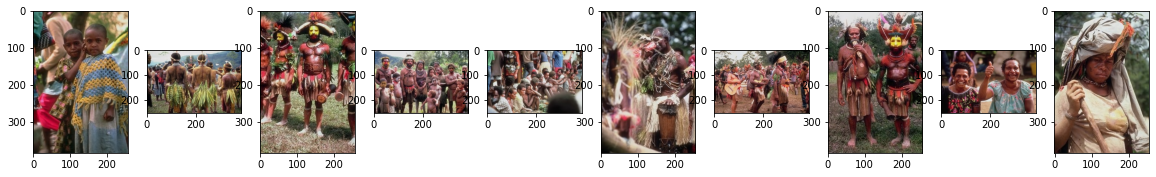

In [57]:
filename = 'static/0.jpg' ## CAMBIAR NOMBRE IMG (o no)
plot_c(filename)


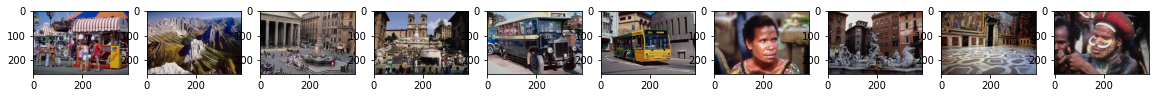

In [58]:
filename = 'static/100.jpg' ## CAMBIAR NOMBRE IMG (o no)
plot_c(filename)

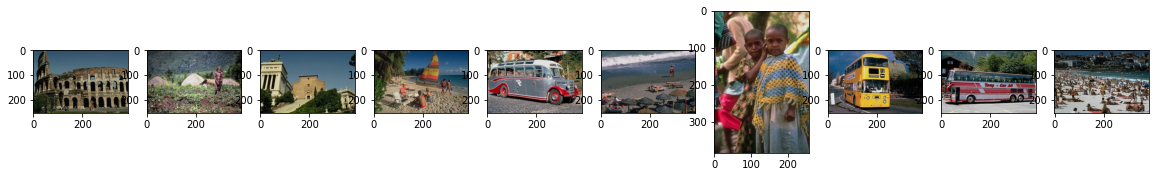

In [59]:
filename = 'static/200.jpg' ## CAMBIAR NOMBRE IMG (o no)
plot_c(filename)